In [1]:
import scanpy as sc
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import getopt

In [2]:
#  plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [ ]:
study = "Ramachandran"
data_dir = "/opt/datastore/aiakovliev/liver"
input_dir = os.path.join(data_dir, study)
file_list = os.path.join(input_dir, "metadata.txt")
sample_dirs = pd.read_csv(file_list)["sample.dir"].tolist()
print(sample_dirs.__class__.__name__)

In [3]:
#this_dir = sample_dirs[0]
this_dir = "/exports/igmm/eddie/ponting-lab/ava/ME_CSF_Hifibio/raw_data/PLRC_HD055V2_fresh_PBMC_CD8_10xscGEX/outs/raw_feature_bc_matrix/"
print(this_dir)
# load count matrix in mtx format
counts_matrix = sc.read_10x_mtx(
    this_dir,  # the directory with the `.mtx` file
    var_names='gene_symbols',   # use gene symbols for the variable names (genes)
    cache=True                 # cache the data
)
# alternatively laod count matrix in h5 format (if available)
if False: 
    counts_matrix = sc.read_10x_h5(this_dir)
print(counts_matrix.__class__.__name__)
# counts_matrix = sc.read_10x_h5(os.path.join(this_dir, "matrix.mtx"))
#counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
#genes = np.array(scr.load_genes(input_dir + '/features.tsv', delimiter='\t', column=1))
#print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
#print('Number of genes in gene list: {}'.format(len(genes)))

/exports/igmm/eddie/ponting-lab/ava/ME_CSF_Hifibio/raw_data/PLRC_HD055V2_fresh_PBMC_CD8_10xscGEX/outs/raw_feature_bc_matrix/
AnnData


In [20]:
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
# Filter out empty droplets
target_barcodes = pd.read_csv(os.path.join(this_dir, 'true_cells.csv'), header=None, names=['barcode'])
print(target_barcodes.head())
# print(counts_matrix.obs_names)
counts_matrix = counts_matrix[counts_matrix.obs_names.isin(target_barcodes['barcode']), :]
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))

Counts matrix shape: 325863 rows, 36601 columns
              barcode
0  AAACCTGAGAAACCGC-1
1  AAACCTGAGAACTCGG-1
2  AAACCTGAGATGCCAG-1
3  AAACCTGAGCGTTCCG-1
4  AAACCTGAGGCTAGGT-1
Counts matrix shape: 8026 rows, 36601 columns


EDR: 0.064208
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 62.1%
Overall doublet rate:
	Expected   = 6.4%
	Estimated  = 8.0%
Elapsed time: 21.3 seconds
Detected doublet rate = 7.4%
Estimated detectable doublet fraction = 70.2%
Overall doublet rate:
	Expected   = 6.4%
	Estimated  = 10.6%


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following famil

Saved /exports/igmm/eddie/ponting-lab/ava/ME_CSF_Hifibio/raw_data/PLRC_HD055V2_fresh_PBMC_CD8_10xscGEX/outs/raw_feature_bc_matrix//scrublet_EDR0.008_DoubletScores.csv
Saved /exports/igmm/eddie/ponting-lab/ava/ME_CSF_Hifibio/raw_data/PLRC_HD055V2_fresh_PBMC_CD8_10xscGEX/outs/raw_feature_bc_matrix//scrublet_EDR0.008_PredictedDoublets.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

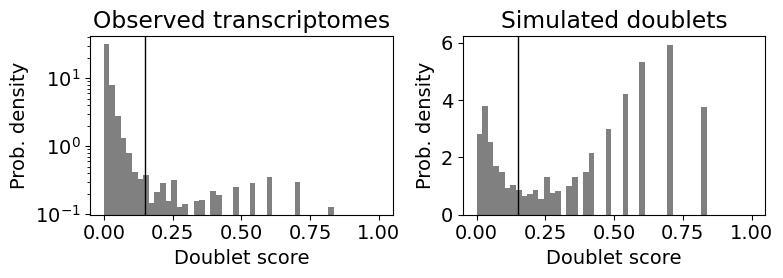

In [21]:
# doublet rates in 1000 cells normally ~0.8% per 1k cells
edr = 0.008
expected_doublet_rate = float(edr)*counts_matrix.shape[0]/1000
print('EDR: {}'.format(expected_doublet_rate))
scrub = scr.Scrublet(counts_matrix.X, expected_doublet_rate = float(expected_doublet_rate))
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=60, 
                                                          n_prin_comps=30,
                                                          log_transform=True,
                                                          mean_center=True,
                                                          normalize_variance=True,
                                                          synthetic_doublet_umi_subsampling = 1)
# after examining the bimodal distribution by eye, insert the threshold here
scrub.call_doublets(threshold=0.15)
scrub.plot_histogram()

outf1 = this_dir + "/scrublet_EDR" + str(edr) + "_DoubletScores.csv"
outf2 = this_dir + "/scrublet_EDR" + str(edr) + "_PredictedDoublets.csv"
np.savetxt(outf1, doublet_scores, delimiter=',')
np.savetxt(outf2, predicted_doublets, delimiter=',')
print("Saved " + outf1)
print("Saved " + outf2)

In [22]:
for s in sample_dirs:
    outf1 = s + "/scrublet_EDR" + str(edr) + "_DoubletScores.csv"
    print(outf1)

NameError: name 'sample_dirs' is not defined

In [ ]:
%matplotlib inline

for s in sample_dirs:
    
    # load count matrix
    if False:
        counts_matrix=sc.read_10x_h5(s)

    counts_matrix=sc.read_10x_mtx(
        s,
        var_names='gene_symbols',
        cache=True
    )
    
    # doublet rates in 1000 cells normally ~0.8% per 1k cells
    edr = 0.008
    expected_doublet_rate = float(edr)*counts_matrix.shape[0]/1000
    print('EDR: {}'.format(expected_doublet_rate))
    
    scrub = scr.Scrublet(counts_matrix.X, expected_doublet_rate = float(expected_doublet_rate))
    
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                      min_cells=3, 
                                                      min_gene_variability_pctl=60, 
                                                      n_prin_comps=30,
                                                      log_transform=True,
                                                      mean_center=True,
                                                      normalize_variance=True,
                                                      synthetic_doublet_umi_subsampling = 1)
    
    # after examining the bimodal distribution by eye, insert the threshold here
    scrub.call_doublets(threshold=0.15)
    scrub.plot_histogram()

    outf1 = s + "/scrublet_EDR" + str(edr) + "_DoubletScores.csv"
    outf2 = s + "/scrublet_EDR" + str(edr) + "_PredictedDoublets.csv"
    np.savetxt(outf1, doublet_scores, delimiter=',')
    np.savetxt(outf2, predicted_doublets, delimiter=',')
    print("Saved " + outf1)
    print("Saved " + outf2)


## Check 2 of the samples that look different

In [ ]:
# load count matrix
counts_matrix = sc.read_10x_mtx(
    this_dir,  # the directory with the `.mtx` file
    var_names='gene_symbols',   # use gene symbols for the variable names (genes)
    cache=True                 # cache the data
)
# alternatively laod count matrix in h5 format (if available)
if False: 
    counts_matrix = sc.read_10x_h5(this_dir)
    
# doublet rates in 1000 cells normally ~0.8% per 1k cells
edr = 0.008
expected_doublet_rate = float(edr)*counts_matrix.shape[0]/1000
print('EDR: {}'.format(expected_doublet_rate))
    
scrub = scr.Scrublet(counts_matrix.X, expected_doublet_rate = float(expected_doublet_rate))
    
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                          min_cells=3,
                                                          min_gene_variability_pctl=60, 
                                                          n_prin_comps=30,
                                                          log_transform=True,
                                                          mean_center=True,
                                                          normalize_variance=True,
                                                          synthetic_doublet_umi_subsampling = 1)
    
# after examining the bimodal distribution by eye, insert the threshold here
scrub.call_doublets(threshold=0.2)
scrub.plot_histogram()